In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

id cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9     cont0     cont1  \
0   1    B    B    B    C    B    B    A    E    C    N  0.201470 -0.014822   
1   2    B    B    A    A    B    D    A    F    A    O  0.743068  0.367411   
2   3    A    A    A    C    B    D    A    D    A    F  0.742708  0.310383   
3   4    B    B    A    C    B    D    A    E    C    K  0.429551  0.620998   
4   6    A    A    A    C    B    D    A    E    A    N  1.058291  0.367492   

      cont2     cont3     cont4     cont5     cont6     cont7     cont8  \
0  0.669699  0.136278  0.610706  0.400361  0.160266  0.310921  0.389470   
1  1.021605  0.365798  0.276853  0.533087  0.558922  0.516294  0.594928   
2 -0.012673  0.576957  0.285074  0.650609  0.375348  0.902567  0.555205   
3  0.577942  0.280610  0.284667  0.668980  0.239061  0.732948  0.679618   
4 -0.052389  0.232407  0.287595  0.686964  0.420667  0.648182  0.684501   

      cont9    cont10    cont11    cont12    cont13    target  
0  0.267559  0.237281  0.377873  0.322401  0.869850  8.113634  
1  0.341439  0.906013  0.921701  0.261975  0.465083  8.481233  
2  0.843531  0.748809  0.620126  0.541474  0.763846  8.364351  
3  0.574844  0.346010  0.714610  0.540150  0.280682  8.049253  
4  0.956692  1.000773  0.776742  0.625849  0.250823  7.972260

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [5]:
df.describe().T

count           mean            std       min            25%  \
id      300000.0  250018.576947  144450.150010  1.000000  124772.500000   
cont0   300000.0       0.527335       0.230599 -0.118039       0.405965   
cont1   300000.0       0.460926       0.214003 -0.069309       0.310494   
cont2   300000.0       0.490498       0.253346 -0.056104       0.300604   
cont3   300000.0       0.496689       0.219199  0.130676       0.329783   
cont4   300000.0       0.491654       0.240074  0.255908       0.284188   
cont5   300000.0       0.510526       0.228232  0.045915       0.354141   
cont6   300000.0       0.467476       0.210331 -0.224689       0.342873   
cont7   300000.0       0.537119       0.218140  0.203763       0.355825   
cont8   300000.0       0.498456       0.239920 -0.260275       0.332486   
cont9   300000.0       0.474872       0.218007  0.117896       0.306874   
cont10  300000.0       0.474492       0.255949  0.048732       0.276017   
cont11  300000.0       0.473216       0.222022  0.052608       0.308151   
cont12  300000.0       0.494561       0.247292 -0.074208       0.289074   
cont13  300000.0       0.508273       0.222950  0.151050       0.300669   
target  300000.0       8.241979       0.746555  0.140329       7.742071   

                  50%            75%            max  
id      250002.500000  375226.500000  499999.000000  
cont0        0.497053       0.668060       1.058443  
cont1        0.427903       0.615113       0.887253  
cont2        0.502462       0.647512       1.034704  
cont3        0.465026       0.664451       1.039560  
cont4        0.390470       0.696599       1.055424  
cont5        0.488865       0.669625       1.067649  
cont6        0.429383       0.573383       1.111552  
cont7        0.504661       0.703441       1.032837  
cont8        0.439151       0.606056       1.040229  
cont9        0.434620       0.614333       0.982922  
cont10       0.459975       0.691579       1.055960  
cont11       0.433812       0.642057       1.071444  
cont12       0.422887       0.714502       0.975035  
cont13       0.472400       0.758447       0.905992  
target       8.191373       8.728634      10.411992

In [6]:
df.shape

(300000, 26)

In [7]:
df.id.nunique()

300000

In [8]:
df.drop("id", axis=1, inplace=True)

In [9]:
df.head()

cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9     cont0     cont1  \
0    B    B    B    C    B    B    A    E    C    N  0.201470 -0.014822   
1    B    B    A    A    B    D    A    F    A    O  0.743068  0.367411   
2    A    A    A    C    B    D    A    D    A    F  0.742708  0.310383   
3    B    B    A    C    B    D    A    E    C    K  0.429551  0.620998   
4    A    A    A    C    B    D    A    E    A    N  1.058291  0.367492   

      cont2     cont3     cont4     cont5     cont6     cont7     cont8  \
0  0.669699  0.136278  0.610706  0.400361  0.160266  0.310921  0.389470   
1  1.021605  0.365798  0.276853  0.533087  0.558922  0.516294  0.594928   
2 -0.012673  0.576957  0.285074  0.650609  0.375348  0.902567  0.555205   
3  0.577942  0.280610  0.284667  0.668980  0.239061  0.732948  0.679618   
4 -0.052389  0.232407  0.287595  0.686964  0.420667  0.648182  0.684501   

      cont9    cont10    cont11    cont12    cont13    target  
0  0.267559  0.237281  0.377873  0.322401  0.869850  8.113634  
1  0.341439  0.906013  0.921701  0.261975  0.465083  8.481233  
2  0.843531  0.748809  0.620126  0.541474  0.763846  8.364351  
3  0.574844  0.346010  0.714610  0.540150  0.280682  8.049253  
4  0.956692  1.000773  0.776742  0.625849  0.250823  7.972260

In [10]:
for i in df[["cat0","cat1","cat2","cat3","cat4","cat5","cat6","cat7","cat8","cat9"]]:
    num_1 = df[i].nunique()
    print(f"{i} columns {num_1}")

cat0 columns 2
cat1 columns 2
cat2 columns 2
cat3 columns 4
cat4 columns 4
cat5 columns 4
cat6 columns 8
cat7 columns 8
cat8 columns 7
cat9 columns 15


In [11]:
ordinal_encoder = OrdinalEncoder()

In [12]:
df[["cat3","cat4","cat5"]]

cat3 cat4 cat5
0         C    B    B
1         A    B    D
2         C    B    D
3         C    B    D
4         C    B    D
...     ...  ...  ...
299995    A    B    D
299996    C    B    B
299997    C    B    C
299998    C    B    B
299999    C    A    D

[300000 rows x 3 columns]

In [13]:
df[["cat3","cat4","cat5"]] = ordinal_encoder.fit_transform(df[["cat3","cat4","cat5"]])

In [14]:
df[["cat3","cat4","cat5"]]

cat3  cat4  cat5
0        2.0   1.0   1.0
1        0.0   1.0   3.0
2        2.0   1.0   3.0
3        2.0   1.0   3.0
4        2.0   1.0   3.0
...      ...   ...   ...
299995   0.0   1.0   3.0
299996   2.0   1.0   1.0
299997   2.0   1.0   2.0
299998   2.0   1.0   1.0
299999   2.0   0.0   3.0

[300000 rows x 3 columns]

In [15]:
df

cat0 cat1 cat2  cat3  cat4  cat5 cat6 cat7 cat8 cat9     cont0  \
0         B    B    B   2.0   1.0   1.0    A    E    C    N  0.201470   
1         B    B    A   0.0   1.0   3.0    A    F    A    O  0.743068   
2         A    A    A   2.0   1.0   3.0    A    D    A    F  0.742708   
3         B    B    A   2.0   1.0   3.0    A    E    C    K  0.429551   
4         A    A    A   2.0   1.0   3.0    A    E    A    N  1.058291   
...     ...  ...  ...   ...   ...   ...  ...  ...  ...  ...       ...   
299995    B    B    A   0.0   1.0   3.0    A    E    A    I  0.697124   
299996    A    B    A   2.0   1.0   1.0    A    E    E    F  0.446200   
299997    B    B    A   2.0   1.0   2.0    A    E    G    F  0.544279   
299998    A    B    A   2.0   1.0   1.0    A    E    E    I  0.300062   
299999    A    A    A   2.0   0.0   3.0    A    E    A    O  0.857752   

           cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0      -0.014822  0.669699  0.136278  0.610706  0.400361  0.160266  0.310921   
1       0.367411  1.021605  0.365798  0.276853  0.533087  0.558922  0.516294   
2       0.310383 -0.012673  0.576957  0.285074  0.650609  0.375348  0.902567   
3       0.620998  0.577942  0.280610  0.284667  0.668980  0.239061  0.732948   
4       0.367492 -0.052389  0.232407  0.287595  0.686964  0.420667  0.648182   
...          ...       ...       ...       ...       ...       ...       ...   
299995  0.483452  0.297770  0.195821  0.307883  0.769792  0.450538  0.934360   
299996  0.715135  0.610931  0.601730  0.736713  0.528056  0.508502  0.358247   
299997  0.060937  0.590955  0.905308  0.277074  0.688747  0.372425  0.364936   
299998  0.613118  0.285213  0.406851  0.805963  0.344404  0.424243  0.382028   
299999  0.628528  0.539625  0.396143  0.276785  0.565347  0.328669  0.789165   

           cont8     cont9    cont10    cont11    cont12    cont13    target  
0       0.389470  0.267559  0.237281  0.377873  0.322401  0.869850  8.113634  
1       0.594928  0.341439  0.906013  0.921701  0.261975  0.465083  8.481233  
2       0.555205  0.843531  0.748809  0.620126  0.541474  0.763846  8.364351  
3       0.679618  0.574844  0.346010  0.714610  0.540150  0.280682  8.049253  
4       0.684501  0.956692  1.000773  0.776742  0.625849  0.250823  7.972260  
...          ...       ...       ...       ...       ...       ...       ...  
299995  1.005077  0.853726  0.422541  1.063463  0.697685  0.506404  7.945605  
299996  0.257825  0.433525  0.301015  0.268447  0.577055  0.823611  7.326118  
299997  0.383224  0.551825  0.661007  0.629606  0.714139  0.245732  8.706755  
299998  0.468819  0.351036  0.288768  0.611169  0.380254  0.332030  7.229569  
299999  0.960406  0.776019  0.734707  0.484392  0.639754  0.689317  8.631146  

[300000 rows x 25 columns]

In [16]:
df.cat0.value_counts()

A    193130
B    106870
Name: cat0, dtype: int64

In [17]:
df.cat1.value_counts()

A    154824
B    145176
Name: cat1, dtype: int64

In [18]:
df.cat2.value_counts()

A    253886
B     46114
Name: cat2, dtype: int64

In [19]:
df["cat0"] = df["cat0"].map({"A":1,"B":0}) 

In [20]:
df["cat1"] = df["cat1"].map({"A":1,"B":0}) 

In [21]:
df["cat2"] = df["cat2"].map({"A":1,"B":0}) 

In [22]:
df

cat0  cat1  cat2  cat3  cat4  cat5 cat6 cat7 cat8 cat9     cont0  \
0          0     0     0   2.0   1.0   1.0    A    E    C    N  0.201470   
1          0     0     1   0.0   1.0   3.0    A    F    A    O  0.743068   
2          1     1     1   2.0   1.0   3.0    A    D    A    F  0.742708   
3          0     0     1   2.0   1.0   3.0    A    E    C    K  0.429551   
4          1     1     1   2.0   1.0   3.0    A    E    A    N  1.058291   
...      ...   ...   ...   ...   ...   ...  ...  ...  ...  ...       ...   
299995     0     0     1   0.0   1.0   3.0    A    E    A    I  0.697124   
299996     1     0     1   2.0   1.0   1.0    A    E    E    F  0.446200   
299997     0     0     1   2.0   1.0   2.0    A    E    G    F  0.544279   
299998     1     0     1   2.0   1.0   1.0    A    E    E    I  0.300062   
299999     1     1     1   2.0   0.0   3.0    A    E    A    O  0.857752   

           cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0      -0.014822  0.669699  0.136278  0.610706  0.400361  0.160266  0.310921   
1       0.367411  1.021605  0.365798  0.276853  0.533087  0.558922  0.516294   
2       0.310383 -0.012673  0.576957  0.285074  0.650609  0.375348  0.902567   
3       0.620998  0.577942  0.280610  0.284667  0.668980  0.239061  0.732948   
4       0.367492 -0.052389  0.232407  0.287595  0.686964  0.420667  0.648182   
...          ...       ...       ...       ...       ...       ...       ...   
299995  0.483452  0.297770  0.195821  0.307883  0.769792  0.450538  0.934360   
299996  0.715135  0.610931  0.601730  0.736713  0.528056  0.508502  0.358247   
299997  0.060937  0.590955  0.905308  0.277074  0.688747  0.372425  0.364936   
299998  0.613118  0.285213  0.406851  0.805963  0.344404  0.424243  0.382028   
299999  0.628528  0.539625  0.396143  0.276785  0.565347  0.328669  0.789165   

           cont8     cont9    cont10    cont11    cont12    cont13    target  
0       0.389470  0.267559  0.237281  0.377873  0.322401  0.869850  8.113634  
1       0.594928  0.341439  0.906013  0.921701  0.261975  0.465083  8.481233  
2       0.555205  0.843531  0.748809  0.620126  0.541474  0.763846  8.364351  
3       0.679618  0.574844  0.346010  0.714610  0.540150  0.280682  8.049253  
4       0.684501  0.956692  1.000773  0.776742  0.625849  0.250823  7.972260  
...          ...       ...       ...       ...       ...       ...       ...  
299995  1.005077  0.853726  0.422541  1.063463  0.697685  0.506404  7.945605  
299996  0.257825  0.433525  0.301015  0.268447  0.577055  0.823611  7.326118  
299997  0.383224  0.551825  0.661007  0.629606  0.714139  0.245732  8.706755  
299998  0.468819  0.351036  0.288768  0.611169  0.380254  0.332030  7.229569  
299999  0.960406  0.776019  0.734707  0.484392  0.639754  0.689317  8.631146  

[300000 rows x 25 columns]

### Outliers

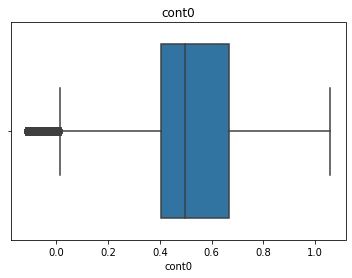

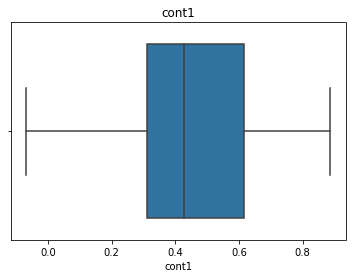

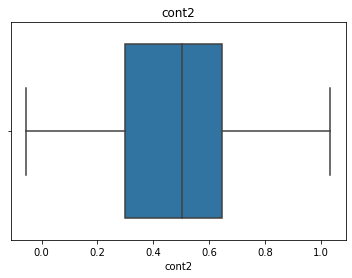

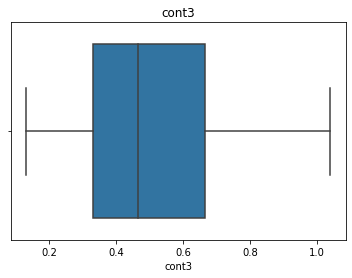

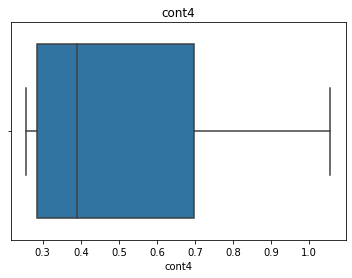

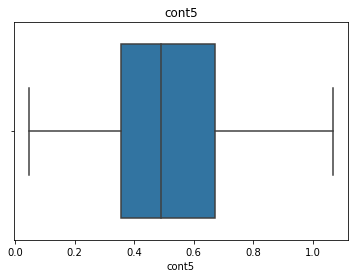

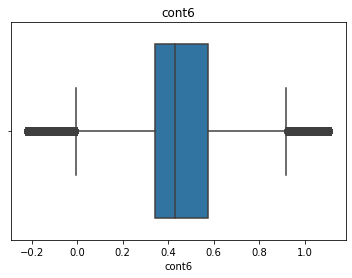

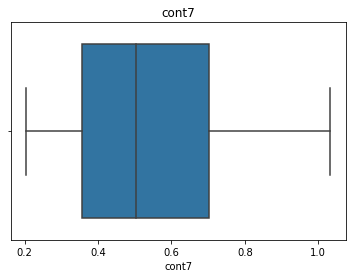

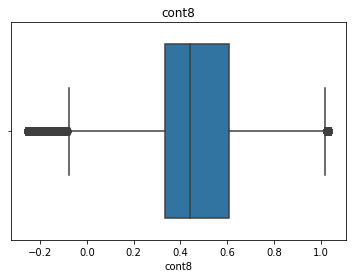

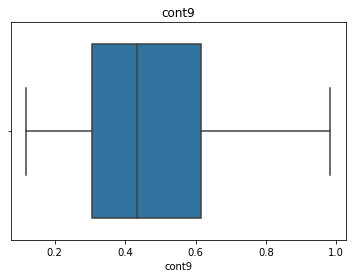

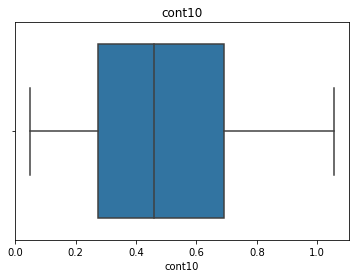

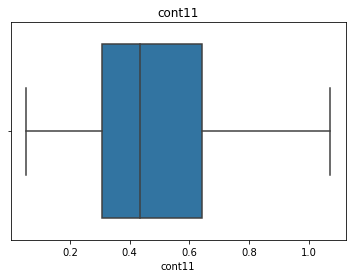

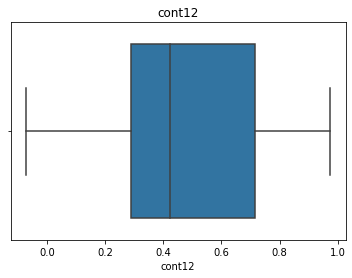

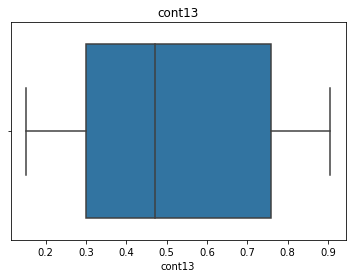

In [23]:
for i in range(0,14):
    cont_feat = "cont" + str(i)
    plt.figure(cont_feat)
    plt.title(cont_feat)
    sns.boxplot(x=cont_feat, data=df)

### get_dummies

In [24]:
df = pd.get_dummies(df, drop_first=True)

In [25]:
df

cat0  cat1  cat2  cat3  cat4  cat5     cont0     cont1     cont2  \
0          0     0     0   2.0   1.0   1.0  0.201470 -0.014822  0.669699   
1          0     0     1   0.0   1.0   3.0  0.743068  0.367411  1.021605   
2          1     1     1   2.0   1.0   3.0  0.742708  0.310383 -0.012673   
3          0     0     1   2.0   1.0   3.0  0.429551  0.620998  0.577942   
4          1     1     1   2.0   1.0   3.0  1.058291  0.367492 -0.052389   
...      ...   ...   ...   ...   ...   ...       ...       ...       ...   
299995     0     0     1   0.0   1.0   3.0  0.697124  0.483452  0.297770   
299996     1     0     1   2.0   1.0   1.0  0.446200  0.715135  0.610931   
299997     0     0     1   2.0   1.0   2.0  0.544279  0.060937  0.590955   
299998     1     0     1   2.0   1.0   1.0  0.300062  0.613118  0.285213   
299999     1     1     1   2.0   0.0   3.0  0.857752  0.628528  0.539625   

           cont3     cont4     cont5     cont6     cont7     cont8     cont9  \
0       0.136278  0.610706  0.400361  0.160266  0.310921  0.389470  0.267559   
1       0.365798  0.276853  0.533087  0.558922  0.516294  0.594928  0.341439   
2       0.576957  0.285074  0.650609  0.375348  0.902567  0.555205  0.843531   
3       0.280610  0.284667  0.668980  0.239061  0.732948  0.679618  0.574844   
4       0.232407  0.287595  0.686964  0.420667  0.648182  0.684501  0.956692   
...          ...       ...       ...       ...       ...       ...       ...   
299995  0.195821  0.307883  0.769792  0.450538  0.934360  1.005077  0.853726   
299996  0.601730  0.736713  0.528056  0.508502  0.358247  0.257825  0.433525   
299997  0.905308  0.277074  0.688747  0.372425  0.364936  0.383224  0.551825   
299998  0.406851  0.805963  0.344404  0.424243  0.382028  0.468819  0.351036   
299999  0.396143  0.276785  0.565347  0.328669  0.789165  0.960406  0.776019   

          cont10    cont11    cont12    cont13    target  cat6_B  cat6_C  \
0       0.237281  0.377873  0.322401  0.869850  8.113634       0       0   
1       0.906013  0.921701  0.261975  0.465083  8.481233       0       0   
2       0.748809  0.620126  0.541474  0.763846  8.364351       0       0   
3       0.346010  0.714610  0.540150  0.280682  8.049253       0       0   
4       1.000773  0.776742  0.625849  0.250823  7.972260       0       0   
...          ...       ...       ...       ...       ...     ...     ...   
299995  0.422541  1.063463  0.697685  0.506404  7.945605       0       0   
299996  0.301015  0.268447  0.577055  0.823611  7.326118       0       0   
299997  0.661007  0.629606  0.714139  0.245732  8.706755       0       0   
299998  0.288768  0.611169  0.380254  0.332030  7.229569       0       0   
299999  0.734707  0.484392  0.639754  0.689317  8.631146       0       0   

        cat6_D  cat6_E  cat6_G  cat6_H  cat6_I  cat7_B  cat7_C  cat7_D  \
0            0       0       0       0       0       0       0       0   
1            0       0       0       0       0       0       0       0   
2            0       0       0       0       0       0       0       1   
3            0       0       0       0       0       0       0       0   
4            0       0       0       0       0       0       0       0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
299995       0       0       0       0       0       0       0       0   
299996       0       0       0       0       0       0       0       0   
299997       0       0       0       0       0       0       0       0   
299998       0       0       0       0       0       0       0       0   
299999       0       0       0       0       0       0       0       0   

        cat7_E  cat7_F  cat7_G  cat7_I  cat8_B  cat8_C  cat8_D  cat8_E  \
0            1       0       0       0       0       1       0       0   
1            0       1       0       0       0       0       0       0   
2            0       0       0       0       0       0       0       0   
3            1       0       0      

### Train-test split

In [26]:
X = df.drop("target", axis=1)
y = df.target

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaler

In [29]:
scaler = MinMaxScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

### XGBoost

In [32]:
from sklearn.model_selection import cross_validate

In [33]:
from xgboost import XGBRegressor

In [87]:
# xgb_model = XGBRegressor(n_jobs=-1,
#                          n_estimators=6000, 
#                          learning_rate=0.10,
#                          subsample=0.96,
#                          colsample_bytree= 0.12,
#                          booster='gbtree',
#                          max_depth=2,
#                          reg_lambda=65.1,
#                          reg_alpha=15.9,
#                          gamma=0.01)

In [34]:
xgb_model = XGBRegressor(n_jobs=-1,
                         n_estimators=6300, 
                         learning_rate=0.09,
                         subsample=0.96,
                         colsample_bytree= 0.12,
                         booster='gbtree',
                         max_depth=2,
                         reg_lambda=65.1,
                         reg_alpha=15.9,
                         gamma=0.01)

In [35]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.12, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.09, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=6300, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=15.9, reg_lambda=65.1, scale_pos_weight=1,
             subsample=0.96, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [36]:
y_pred= xgb_model.predict(X_test)

In [37]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [38]:
eval_metrics(y_test, y_pred)

r2_score: 0.07833583583256509 
 mae: 0.5689325758174005 
 mse: 0.5125010887393718 
 rmse: 0.7158918135719753


In [ ]:
# Score 1

In [165]:
eval_metrics(y_test, y_pred)

r2_score: 0.0785474548109345 
 mae: 0.5688388496764306 
 mse: 0.5123834157723316 
 rmse: 0.7158096225759553


In [ ]:
# Score 2

In [416]:
eval_metrics(y_test, y_pred)

r2_score: 0.07845055165079062 
 mae: 0.5689194854118468 
 mse: 0.5124372997975621 
 rmse: 0.7158472601034122


In [ ]:
# Score 3

In [39]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [40]:
comp_sample = compare.head(10)
comp_sample

Actual      Pred
4941    9.374259  8.209439
51775   8.991401  8.437619
115253  8.514022  8.308294
299321  8.468016  7.931011
173570  7.129968  8.339235
30862   9.991019  8.403913
244471  7.481978  7.778337
127794  7.985232  7.887973
71558   8.823578  8.329036
218011  8.320789  8.322639

### GridSearchCV

In [ ]:
xgb_model2 = XGBRegressor()

In [ ]:
param_grid ={"n_estimators":[4000, 5000, 6000, 8000, 100000],
            "learning_rate":[0.08, 0.10, 0.11, 0.12, 0.15, 0.16, 0.17, 0.18],
            "gamma":[0.005, 0.01, 0.02, 0.03],
            "subsample":[0.94, 0.95, 0.96, 0.97, 0.99, 1],
            "max_depth":[1, 2, 3],
            "reg_lambda":[65, 65.1, 65.2, 66],
            "reg_alpha":[15.5, 15,7, 15.9, 16, 16.3]}

In [ ]:
grid_model = GridSearchCV(estimator = xgb_model2, param_grid = param_grid, scoring = ['r2_score','mean_squared_error'], cv =10, verbose =2)

In [ ]:
grid_model.fit(X_train, y_train)

In [ ]:
grid_model.best_params_

In [ ]:
y_pred = grid_model.predict(X_test)

In [ ]:
eval_metrics(y_test, y_pred)

### Predictions

In [166]:
test_df = pd.read_csv("test.csv")

In [167]:
test_df.head()

id cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9     cont0     cont1  \
0   0    B    B    B    C    B    B    A    E    E    I  0.296227  0.686757   
1   5    A    B    A    C    B    C    A    E    C    H  0.543707  0.364761   
2  15    B    A    A    A    B    B    A    E    D    K  0.408961  0.296129   
3  16    B    B    A    C    B    D    A    E    A    N  1.031239  0.356062   
4  17    B    B    A    C    B    C    A    E    C    F  0.530447  0.729004   

      cont2     cont3     cont4     cont5     cont6     cont7     cont8  \
0  0.587731  0.392753  0.476739  0.376350  0.337884  0.321832  0.445212   
1  0.452967  0.929645  0.285509  0.860046  0.798712  0.835961  0.391657   
2  0.690999  0.740027  0.697272  0.683600  0.404089  0.879379  0.275549   
3  0.303651  0.895591  0.719306  0.777890  0.730954  0.644315  1.024017   
4  0.281723  0.444698  0.313032  0.431007  0.390992  0.408874  0.447887   

      cont9    cont10    cont11    cont12    cont13  
0  0.290258  0.244476  0.087914  0.301831  0.845702  
1  0.288276  0.549568  0.905097  0.850684  0.693940  
2  0.427871  0.491667  0.384315  0.376689  0.508099  
3  0.391090  0.988340  0.411828  0.393585  0.461372  
4  0.390253  0.648932  0.385935  0.370401  0.900412

In [168]:
test_df = test_df.drop("id", axis=1)

In [169]:
test_df.head()

cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9     cont0     cont1  \
0    B    B    B    C    B    B    A    E    E    I  0.296227  0.686757   
1    A    B    A    C    B    C    A    E    C    H  0.543707  0.364761   
2    B    A    A    A    B    B    A    E    D    K  0.408961  0.296129   
3    B    B    A    C    B    D    A    E    A    N  1.031239  0.356062   
4    B    B    A    C    B    C    A    E    C    F  0.530447  0.729004   

      cont2     cont3     cont4     cont5     cont6     cont7     cont8  \
0  0.587731  0.392753  0.476739  0.376350  0.337884  0.321832  0.445212   
1  0.452967  0.929645  0.285509  0.860046  0.798712  0.835961  0.391657   
2  0.690999  0.740027  0.697272  0.683600  0.404089  0.879379  0.275549   
3  0.303651  0.895591  0.719306  0.777890  0.730954  0.644315  1.024017   
4  0.281723  0.444698  0.313032  0.431007  0.390992  0.408874  0.447887   

      cont9    cont10    cont11    cont12    cont13  
0  0.290258  0.244476  0.087914  0.301831  0.845702  
1  0.288276  0.549568  0.905097  0.850684  0.693940  
2  0.427871  0.491667  0.384315  0.376689  0.508099  
3  0.391090  0.988340  0.411828  0.393585  0.461372  
4  0.390253  0.648932  0.385935  0.370401  0.900412

In [170]:
test_df = pd.get_dummies(test_df, drop_first=True)

In [171]:
test_df.head()

cont0     cont1     cont2     cont3     cont4     cont5     cont6  \
0  0.296227  0.686757  0.587731  0.392753  0.476739  0.376350  0.337884   
1  0.543707  0.364761  0.452967  0.929645  0.285509  0.860046  0.798712   
2  0.408961  0.296129  0.690999  0.740027  0.697272  0.683600  0.404089   
3  1.031239  0.356062  0.303651  0.895591  0.719306  0.777890  0.730954   
4  0.530447  0.729004  0.281723  0.444698  0.313032  0.431007  0.390992   

      cont7     cont8     cont9    cont10    cont11    cont12    cont13  \
0  0.321832  0.445212  0.290258  0.244476  0.087914  0.301831  0.845702   
1  0.835961  0.391657  0.288276  0.549568  0.905097  0.850684  0.693940   
2  0.879379  0.275549  0.427871  0.491667  0.384315  0.376689  0.508099   
3  0.644315  1.024017  0.391090  0.988340  0.411828  0.393585  0.461372   
4  0.408874  0.447887  0.390253  0.648932  0.385935  0.370401  0.900412   

   cat0_B  cat1_B  cat2_B  cat3_B  cat3_C  cat3_D  cat4_B  cat4_C  cat4_D  \
0       1       1       1       0       1       0       1       0       0   
1       0       1       0       0       1       0       1       0       0   
2       1       0       0       0       0       0       1       0       0   
3       1       1       0       0       1       0       1       0       0   
4       1       1       0       0       1       0       1       0       0   

   cat5_B  cat5_C  cat5_D  cat6_B  cat6_C  cat6_D  cat6_E  cat6_G  cat6_H  \
0       1       0       0       0       0       0       0       0       0   
1       0       1       0       0       0       0       0       0       0   
2       1       0       0       0       0       0       0       0       0   
3       0       0       1       0       0       0       0       0       0   
4       0       1       0       0       0       0       0       0       0   

   cat6_I  cat7_B  cat7_C  cat7_D  cat7_E  cat7_F  cat7_G  cat7_I  cat8_B  \
0       0       0       0       0       1       0       0       0       0   
1       0       0       0       0       1       0       0       0       0   
2       0       0       0       0       1       0       0       0       0   
3       0       0       0       0       1       0       0       0       0   
4       0       0       0       0       1       0       0       0       0   

   cat8_C  cat8_D  cat8_E  cat8_F  cat8_G  cat9_B  cat9_C  cat9_D  cat9_E  \
0       0       0       1       0       0       0       0       0       0   
1       1       0       0       0       0       0       0       0       0   
2       0       1       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       1       0       0       0       0       0       0       0       0   

   cat9_F  cat9_G  cat9_H  cat9_I  cat9_J  cat9_K  cat9_L  cat9_M  cat9_N  \
0       0       0       0       1       0       0       0       0       0   
1       0       0       1       0       0       0       0       0       0   
2       0       0       0       0       0       1       0       0       0   
3       0       0       0       0       0       0       0       0       1   
4       1       0       0       0       0       0       0       0       0   

   cat9_O  
0       0  
1       0  
2       0  
3       0  
4       0

In [172]:
test_df = scaler.transform(test_df)

In [173]:
test_df

array([[-0.76599379,  0.84966931,  0.24676735, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17929196, -0.20758708, -0.14215621, ...,  0.        ,
         0.        ,  0.        ],
       [-0.33538955, -0.43293301,  0.54479555, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.45214924,  0.39895782, -0.26235078, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.97621477,  0.0070795 , -1.2534622 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.51471213, -0.23834363,  1.21243169, ...,  0.        ,
         0.        ,  0.        ]])

In [174]:
preds = xgb_model.predict(test_df)

In [175]:
# preds = grid_model.predict(test_df)

In [176]:
submission = pd.read_csv("sample_submission.csv")

In [177]:
submission["target"] = preds

In [178]:
submission.head()

id    target
0   0  8.113431
1   5  8.410625
2  15  8.400706
3  16  8.470076
4  17  8.134197

In [179]:
submission.to_csv("submission.csv", index=False)